<center><h2> Module 3 Project</h2></center>
<center><h2> Data Loading & Cleaning</h2></center>



In terms of our dataset, we are combing data on the boroughs of London, together with air quality data, to advise potential homebuyers or renters moving to Greater London.


### London Borough Data

The borough related data contains 85 columns, including lots of demographic data. However we are only keeping 19 columns which we think would be of interest given our target customers, in particular these columns can be grouped into:

<h4>(1) potential drivers of air quality</h4>

- Population density (per hectare) 2016
- % of area that is Greenspace, 2005
- Total carbon emissions (2013)
- Number of cars, (2011 Census)

<h4>(2) factual info that potential homebuyers would be interested to know</h4>

- Unemployment rate (2015)
- Number of active businesses, 2014
- Crime rates per thousand population 2014/15
- Median House Price, 2014
- Average Band D Council Tax charge (£), 2015/16
- Rented from Local Authority or Housing Association, (2014) %
- Average Public Transport Accessibility score, 2014
- Achievement of 5 or more A*- C grades at GCSE or equivalent including English and Maths, 2013/14
- Political control in council

<h4>(3) Survey data of residents</h4>

- Life satisfaction score 2011-14 (out of 10)
- Happiness score 2011-14 (out of 10)
- Anxiety score 2011-14 (out of 10)


### Air Quality Data 

We are using the Breezo Air Quality Index data as measure of air quality, and we're accessing the data via the Breezo API. The Breezo Air Qaulity Index is an in-house produced global measure of air quality index, combining national AQI index, academic research and latest real-time data. As air quality data is dynamic and fast-changing, Breezo is able to provide a hourly basis measure of air quality data, which can be different at any given time from street to street. if pollution levels are low in the morning, things might dramatically change in just a couple of hours. 

The Breezo Air Quality Data Scale puts air quality on a scale of 0 to 100, 0 to 19 being Poor air quality and 100 being best air quality.

- 0 to 19 Poor
- 20 to 39 Low
- 40 to 50 Moderate
- 60 to 79 Fair
- 100 Exellent

In [2]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import data_cleaning as dc
import api
import numpy as np
import statistics as stats

import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
borough_data = dc.full_clean()

# borough_data = pd.read_csv('./data/borough_data_cleaned_coordi.csv',index_col=0)

In preparing the data, we first load the original Kaggle dataset (read csv), keep the columns we are interested in and call Mapbox API to get the coornidates of each borough. This means the coordinate is one point in a borough, where the Mapbox defines as the centre of that borough.

In getting the Air Quality data from the Breezo API, due to the limiation of the API calls capped at 1000 daily, and we have 33 boroughs in London that we are interested in. The maximum we can pull at one time is 24 hours worth of air quality data for all 33 boroughs, we can save this in a csv file and we will read from the csv file for the last 24 hours of air quality data for each borough (as of 2019-Nov-12).

In [3]:

# RUN THIS ONLY ONCE, afterwards, read_csv
# dc.aqi_data(borough_data, 24)
aqi = pd.read_csv('./data/borough_data_cleaned_aqi.csv',index_col=0)

# after reading the saved aqi data, turn it into a list and calcualte mean and average
aqi.aqi_24 = aqi.aqi_24.map(lambda x: [int(i) for i in x[1:-1].split(', ')])
aqi['aqi_mean'] = aqi.aqi_24.map(lambda x: np.asarray(x).mean())

In [4]:
aqi.head(3)

,code,area,inner_outer,population,unemployment,active_business,crime,house_price,council_tax,council_rental,...,cars,pub_transport,achievement,life,happiness,anxiety,political,coordi,aqi_24,aqi_mean
0,E09000001,City of London,Inner London,28.9,.,19250,.,765000,943,.,...,1692,7.9,78.6,6.59,5.99,5.57,.,"[[51.513988, -0.104885]]","[69, 70, 65, 57, 76, 71, 74, 79, 78, 81, 81, 8...",74.666667
1,E09000002,Barking and Dagenham,Outer London,57.3,11,5690,83.4,215000,1332,35.9,...,56966,3.0,58.0,7.14,7.05,3.05,Lab,"[[51.55903, 0.155831]]","[79, 75, 67, 72, 68, 74, 79, 78, 79, 85, 84, 8...",78.416667
2,E09000003,Barnet,Outer London,44.5,8.5,24555,62.7,400000,1397,11.1,...,144717,3.0,67.3,7.48,7.37,2.75,Cons,"[[51.658724, -0.190878]]","[82, 83, 85, 89, 88, 89, 87, 87, 89, 87, 84, 8...",86.375000


<center><h2> EDA on AQI and something to group on </h2></center>

Looking for interesting relationships that we could group the data by and test the air quality difference in between the two groups.

- Looks like boroughs with current political seat in the Labour party may have lower house price
- Air quality in Outer London Boroughs have a wider range but boroughs with the best air quality is all in Outer London.

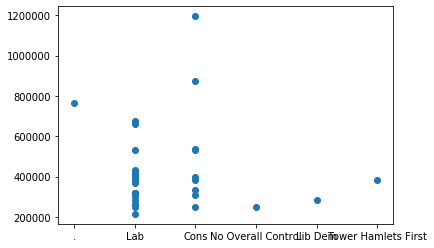

In [34]:
# plt.scatter(aqi.house_price, aqi.anxiety)
plt.scatter(aqi.political, aqi.house_price)

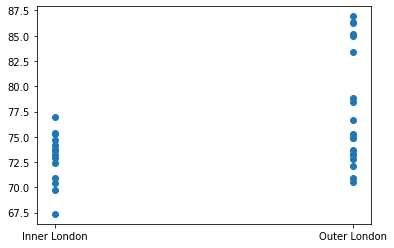

In [35]:
plt.scatter(aqi.inner_outer, aqi.aqi_mean)

<center><h2> Advice for Customers </h2></center>

Looking for interesting relationships to advice to target customers.

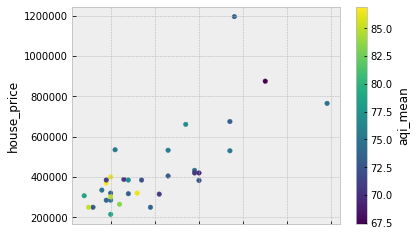

In [102]:
aqi.plot.scatter('pub_transport', 'house_price', c = 'aqi_mean', colormap = 'viridis')

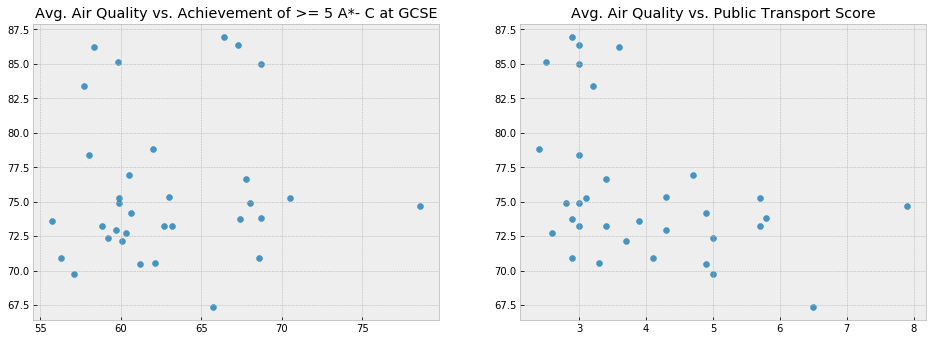

In [100]:
plt.style.use('bmh')
fig = plt.figure(figsize = (16,12))

ax1 = fig.add_subplot(221)
plt.scatter(aqi.achievement, aqi.aqi_mean, alpha=0.9)
plt.title('Avg. Air Quality vs. Achievement of >= 5 A*- C at GCSE')

ax2 = fig.add_subplot(222)
plt.scatter(aqi.pub_transport, aqi.aqi_mean, alpha=0.9)
plt.title('Avg. Air Quality vs. Public Transport Score')

plt.show()

Although we found that better air quality does not mean it has better schools, and for convinience of public transport, boroughs with better air quality actually has a lower public transport score. 

Given that budget is usually set for each customer and it's depended on their situation, we then look at how house price, air quality and school quality combines together.



In [1]:
plt.style.use('bmh')
fig = plt.figure(figsize = (20,14))

ax1 = fig.add_subplot(221)
plt.scatter(aqi.achievement, aqi.house_price, c=aqi.aqi_mean, s=aqi.greenspace)
plt.title('Median House Price vs. School Quality')

plt.show()

NameError: name 'plt' is not defined

In [126]:
# aqi[(aqi['house_price']<=420000) & (aqi['achievement']>65) ]